In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
import pandas.plotting as pd_plot
import scipy as sc
from pandas import DataFrame
import statsmodels.api as sm

In [10]:
def mean_CI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = se * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96 / np.sqrt(n-1)
    return m, m - h, m + h

## Exercise 5.3
We consider data on outdoor running world records for men and women for distances
between 1 km and marathon (42.195 km). The data file worldrecords.dta contain
the world records (as of February 19, 2013) for men and women on 13 different distances
(1=males, 2=females). From 1 km to 10 km the records are set on a running track, while
longer records on the longer distances are set on roads. 

## Part A
### A.1) Fit a linear regression model of time on distance, separately for men and women. Discuss the validity of the model assumptions.

In [88]:
%matplotlib inline

run_data = pd.read_csv('data/worldrecords.csv', sep=';', decimal=",")

run_data_male = run_data.loc[danfund['sex'] == 'Men']
run_data_female = run_data.loc[danfund['sex'] == 'Women']

X = sm.add_constant(run_data_male[['dist']])
Y = run_data_male['time']
model_male = sm.OLS(Y, X).fit()
print('---------------------------- Male group ----------------------------\n', model_male.summary())

X = sm.add_constant(run_data_female[['dist']])
Y = run_data_female['time']
model_female = sm.OLS(Y, X).fit()
print('\n \n---------------------------- Female group ----------------------------\n', model_female.summary())

---------------------------- Male group ----------------------------
                             OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8865.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.47e-16
Time:                        15:00:02   Log-Likelihood:                -19.747
No. Observations:                  12   AIC:                             43.49
Df Residuals:                      10   BIC:                             44.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/home/liabar/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/liabar/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [89]:
## residues
X = sm.add_constant(run_data_male[['dist']])
Residuals_male = run_data_male['time'] -model_male.predict(X)
model_male_res = sm.OLS(Residuals_male, X).fit()

X = sm.add_constant(run_data_female[['dist']])
Residuals_female = run_data_female['time'] -model_female.predict(X)
model_female_res = sm.OLS(Residuals_female, X).fit()


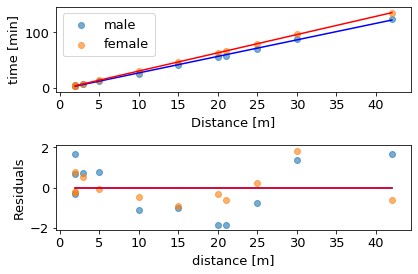

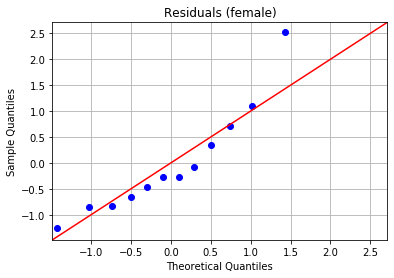

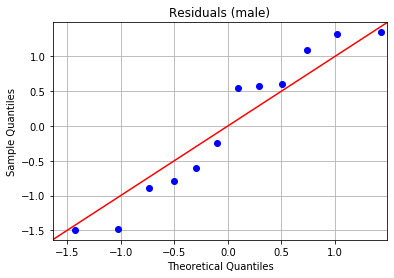

In [90]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(2, 1)

ax[0].scatter(run_data_male['dist'], run_data_male['time'], color='C0', alpha=0.6, label='male')
ax[0].plot(run_data_male['dist'], model_male.predict(sm.add_constant(run_data_male['dist'])), color='blue')
ax[0].scatter(run_data_female['dist'], run_data_female['time'], color='C1', alpha=0.6, label='female')
ax[0].plot(run_data_female['dist'], model_female.predict(sm.add_constant(run_data_female['dist'])), color='red')
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('time [min]')
ax[0].legend()

ax[1].scatter(run_data_male['dist'], Residuals_male, color='C0', alpha=0.6, label='male')
ax[1].plot(run_data_male['dist'], model_male_res.predict(sm.add_constant(run_data_male['dist'])), color='blue')
ax[1].scatter(run_data_female['dist'], Residuals_female, color='C1', alpha=0.6, label='female')
ax[1].plot(run_data_female['dist'], model_female_res.predict(sm.add_constant(run_data_female['dist'])), color='red')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('distance [m]')
plt.tight_layout()
plt.show()

## QQ-plot of the residuals
plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_female, fit=True, line='45')
plt.title('Residuals (female)')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_male, fit=True, line='45')
plt.title('Residuals (male)')
plt.grid()
plt.show()

The residuals do not look to be normally distributed with distance. Therefore , the model assumptions don't seem to be completely satisfied.

### A.b) Estimate and interpret the slope for men and women, respectively.

Male group: slope =  2.9757 (95% CI 2.905, 3.046)

Female group: slope =  3.2849 (95% CI 3.244, 3.325)

The difference is slope can be interpreted by a difference in how fast the two groups can run. The 95% confidence interval of the two slopes do not intercept, so there is a statistically significant difference between them.

### A.c) Examine if the absolute time difference between men and women is the same for all distances.

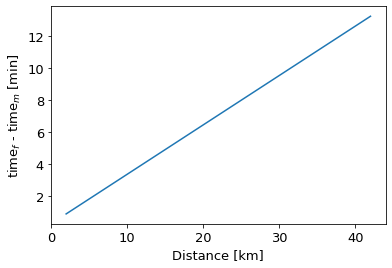

In [91]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 1)

x_dist = np.linspace(np.amin(run_data_male['dist']), np.amax(run_data_male['dist']))
ax.plot(x_dist, abs(model_male.predict(sm.add_constant(x_dist)) - model_female.predict(sm.add_constant(x_dist))))
ax.set_ylabel('time${}_{f}$ - time${}_{m}$ [min]')
ax.set_xlabel('Distance [km]')
plt.show()

The absolute time difference between the make and female group increases with distance.

### A.d) Predict the expected running time for a world record on 4 km for both men and women

In [92]:
x = [[1, 4]]

print('The expected running time for a man is:\n')
prediction = model_male.get_prediction(x)
print(prediction.summary_frame(alpha=0.05))

print('\n')
print('The expected running time for a woman is:\n')
prediction = model_female.get_prediction(x)
print(prediction.summary_frame(alpha=0.05))


The expected running time for a man is:

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  9.261606  0.522271       8.097914      10.425297      5.986299   

   obs_ci_upper  
0     12.536912  


The expected running time for a woman is:

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  10.770842  0.300662      10.100926      11.440757      8.885308   

   obs_ci_upper  
0     12.656375  


## Part B
### B.1) Fit a linear regression model of log-time on log-distance, separately for men and women. Discuss the validity of the model assumptions.

In [132]:
run_data_male['log_dist'] = np.log(run_data_male['dist'])
run_data_male['log_time'] = np.log(run_data_male['time'])

run_data_female['log_dist'] = np.log(run_data_female['dist'])
run_data_female['log_time'] = np.log(run_data_female['time'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [133]:
X = sm.add_constant(run_data_male[['log_dist']])
Y = run_data_male['log_time']
model_male_log = sm.OLS(Y, X).fit()
print('---------------------------- Male group ----------------------------\n', model_male_log.summary())

X = sm.add_constant(run_data_female[['log_dist']])
Y = run_data_female['log_time']
model_female_log = sm.OLS(Y, X).fit()
print('\n \n---------------------------- Female group ----------------------------\n', model_female_log.summary())

---------------------------- Male group ----------------------------
                             OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1189.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           9.98e-12
Time:                        08:36:47   Log-Likelihood:                 8.8909
No. Observations:                  12   AIC:                            -13.78
Df Residuals:                      10   BIC:                            -12.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/home/liabar/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/liabar/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [134]:
## residues
X = sm.add_constant(run_data_male[['log_dist']])
Residuals_male_log = run_data_male['log_time'] - model_male_log.predict(X)
model_male_res_log = sm.OLS(Residuals_male_log, X).fit()

X = sm.add_constant(run_data_female[['log_dist']])
Residuals_female_log = run_data_female['log_time'] - model_female_log.predict(X)
model_female_res_log = sm.OLS(Residuals_female_log, X).fit()


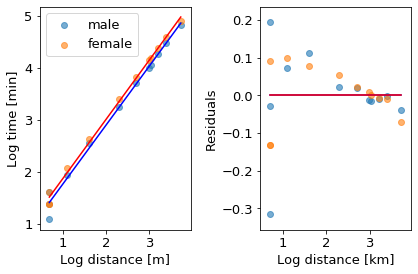

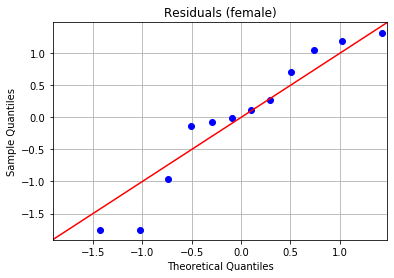

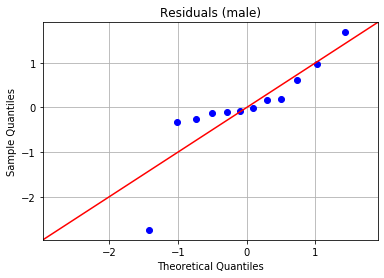

In [135]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 2)

ax[0].scatter(run_data_male['log_dist'], run_data_male['log_time'], color='C0', alpha=0.6, label='male')
ax[0].plot(run_data_male['log_dist'], model_male_log.predict(sm.add_constant(run_data_male['log_dist'])), color='blue')
ax[0].scatter(run_data_female['log_dist'], run_data_female['log_time'], color='C1', alpha=0.6, label='female')
ax[0].plot(run_data_female['log_dist'], model_female_log.predict(sm.add_constant(run_data_female['log_dist'])), color='red')
ax[0].set_xlabel('Log distance [m]')
ax[0].set_ylabel('Log time [min]')
ax[0].legend()

ax[1].scatter(run_data_male['log_dist'], Residuals_male_log, color='C0', alpha=0.6, label='male')
ax[1].plot(run_data_male['log_dist'], model_male_res_log.predict(sm.add_constant(run_data_male['log_dist'])), color='blue')
ax[1].scatter(run_data_female['log_dist'], Residuals_female_log, color='C1', alpha=0.6, label='female')
ax[1].plot(run_data_female['log_dist'], model_female_res_log.predict(sm.add_constant(run_data_female['log_dist'])), color='red')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Log distance [km]')
plt.tight_layout()
plt.show()

## QQ-plot of the residuals
plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_female_log, fit=True, line='45')
plt.title('Residuals (female)')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_male_log, fit=True, line='45')
plt.title('Residuals (male)')
plt.grid()
plt.show()

### B.2) Examine if the relative time difference between men and women is the same for all distances (the hypothesis of no interaction between distance and sex in the model of logtime). 
Use the model of log-time on log-distance with no interaction between distance and sex. 

## Part C

### C.1) Predict the expected running time for a world record on 4 km for both men and women (you may need to use that log(4) = 1.386294). 

### C.2)  Write an equation for the running times as a function of sex and distance. 

### C.3) Quantify the difference between male and female running times.

One parameter predicting the running time is the maximal oxygen consumption
(VO2max), which in a random sample usually follows a normal distribution. In a random
sample of 50 active men and 50 active women the VO2max was found to be an average
of 45.2 (sd=5.1) for the men and 40.4 (sd=4.9) for women. One VO2max was missing
among the men and 4 were missing among the women. 

### C.4) Estimate the absolute mean difference in VO2max between men and women. Estimate without confidence interval the relative mean difference in VO2max between men and women. Do the data suggest the rate of missing data depends on sex? 

### C.5) Discuss if the difference in running times between men and women can be explained by a difference in VO2max.